[1. 1. 1. ... 1. 1. 1.]


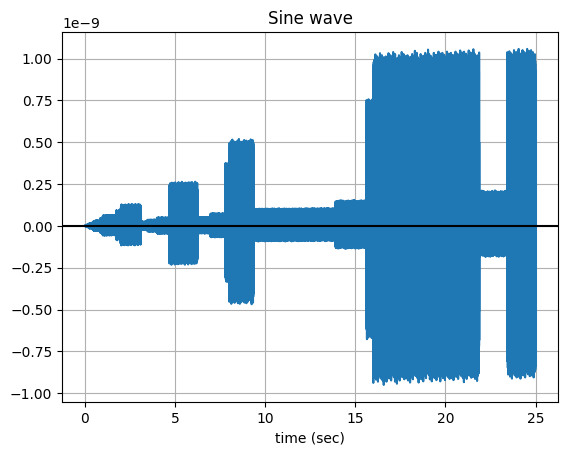

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

samplingFreq = 9600
EndTime = 0.04
startTime = 0
samplingPeriod = 1/samplingFreq

CarrierFreq= 48000

#standard modulation
Peakamplitude = 1.0
modulationIndex = 0.8

bitrate = 10000
upsample_rate = 15000
symbols = [1,1,0,1,0,1,0,0,0,0,1,1,1,1,0,1]

#bitstream
symbols_upsampled = []

for i in range(0,len(symbols),1):
  if symbols[i]==0:
    symbols_upsampled.append(np.zeros(upsample_rate))
  else:
    symbols_upsampled.append(np.ones(upsample_rate))

stacksymbols = np.hstack(symbols_upsampled)
print (stacksymbols)

# Time matching length of stacksymbols
time = np.arange(startTime, startTime + len(stacksymbols) * samplingPeriod, samplingPeriod)

carrierwave = Peakamplitude*np.sin(2*math.pi*CarrierFreq*time) # Modulating Signal

# Modulate the carrier wave using Amplitude Shift Keying (ASK)
# Amplitude for symbol '0' will be Peakamplitude * (1 - modulationIndex)
# Amplitude for symbol '1' will be Peakamplitude
realwave = carrierwave * ((1 - modulationIndex) + modulationIndex * stacksymbols)

plt.figure(1)
plt.plot(time, realwave)
plt.title('Sine wave')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')


plt.xlabel('time (sec)')

plt.show()

Original Symbols: [1, 0, 1, 1, 0, 1, 0, 0]
Decoded Bits:   [1, 0, 1, 1, 0, 1, 0, 0]


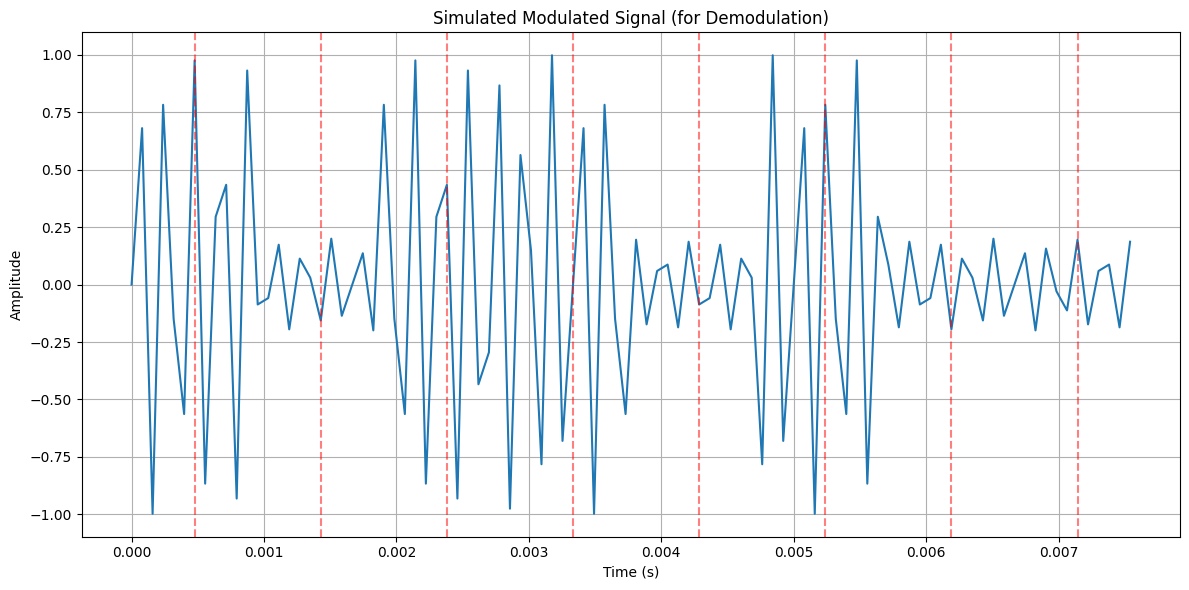

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math

# --- Parameters for Demodulation (can be adjusted) ---
samplingFreq_demod = 9600  # Sampling frequency of the received signal
CarrierFreq_demod = 2000  # Carrier frequency used in modulation
bitrate_demod = 1000       # Bitrate of the original signal

# Calculate samples per bit for demodulation
samples_per_bit_demod = int(samplingFreq_demod / bitrate_demod)

# --- Simulate a simple ASK modulated signal for demonstration ---
# This part assumes a signal similar to what was generated before.
# In a real scenario, this would be your received signal.

sim_symbols = [1, 0, 1, 1, 0, 1, 0, 0] # A short sequence of bits
Peakamplitude_sim = 1.0
modulationIndex_sim = 0.8

# Upsample the simulated symbols
sim_symbols_upsampled = []
for bit in sim_symbols:
    if bit == 0:
        sim_symbols_upsampled.append(np.zeros(samples_per_bit_demod))
    else:
        sim_symbols_upsampled.append(np.ones(samples_per_bit_demod))

sim_stacksymbols = np.hstack(sim_symbols_upsampled)

# Generate time vector
time_sim = np.arange(0, len(sim_stacksymbols) * (1/samplingFreq_demod), (1/samplingFreq_demod))

# Generate carrier wave
carrierwave_sim = Peakamplitude_sim * np.sin(2 * math.pi * CarrierFreq_demod * time_sim)

# Generate the simulated modulated signal
modulated_signal = carrierwave_sim * ((1 - modulationIndex_sim) + modulationIndex_sim * sim_stacksymbols)

# --- ASK Demodulation ---
decoded_bits = []
# Threshold for distinguishing 0s and 1s. This is an average of the two amplitude levels.
# Amplitude for 1: Peakamplitude_sim
# Amplitude for 0: Peakamplitude_sim * (1 - modulationIndex_sim)
# So, threshold is roughly (Peakamplitude_sim + Peakamplitude_sim * (1 - modulationIndex_sim)) / 2
demod_threshold = Peakamplitude_sim * (1 - modulationIndex_sim / 2)

# Iterate through the modulated signal in chunks of 'samples_per_bit_demod'
for i in range(0, len(modulated_signal), samples_per_bit_demod):
    # Extract one bit duration of the signal
    bit_segment = modulated_signal[i : i + samples_per_bit_demod]

    # Take the absolute value and average to get an amplitude estimate for this bit
    # In a more robust demodulator, you might use envelope detection or matched filtering.
    amplitude_estimate = np.mean(np.abs(bit_segment))

    # Compare the amplitude estimate to a threshold to decide the bit
    if amplitude_estimate > demod_threshold:
        decoded_bits.append(1)
    else:
        decoded_bits.append(0)

print(f"Original Symbols: {sim_symbols}")
print(f"Decoded Bits:   {decoded_bits}")

# --- Optional: Plotting for visualization ---
plt.figure(figsize=(12, 6))
plt.plot(time_sim, modulated_signal)
plt.title('Simulated Modulated Signal (for Demodulation)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

# Mark demodulation points
for i in range(len(sim_symbols)):
    sample_point_index = i * samples_per_bit_demod + samples_per_bit_demod // 2 # Middle of each bit
    if sample_point_index < len(time_sim):
        plt.axvline(x=time_sim[sample_point_index], color='r', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()